<a href="https://colab.research.google.com/github/nidhinraj3/LendingClubCaseStudy/blob/main/Lending_Club_Default_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####<font color='Green' size='5'><b>Problem Statement</b></font>


A consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

Two types of risks are associated with the bank’s decision:


1.   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2.   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

**Business Objective**

The aim is to identify patterns which indicate if a person is likely to be defaulter, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

Therby identifying such loan applicants risky loans can be reduced thereby cutting down the credit loss(financial loss).


####<font color='Green' size='5'><b>Data Understanding</b></font>

In [100]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
#read the dataset
loan_df=pd.read_csv("loan.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [102]:
#Read the First five rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [103]:
#shape of the dataframe
loan_df.shape

(39717, 111)

Here we understand that the size of the dataset which have 39717 records and 111 columns

In [104]:
#information about the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [105]:
#information about the dataframe with full summary and col counts
loan_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [106]:
#data types for the data frame
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


#### <font color='Green' size='5'><b>Data Handling/ Cleansing</b></font>

We will need to make sure that there are no missing values or incorrect data types before analysis.

We will use the following:

For Missing Values: 

1.   Dropping the rows/columns containing missing values
2.   Imputing the missing values


Incorrect Data Types:

1.   Clean values
2.   Convert incorrect column type





In [107]:
#Copy the dataframe to flter dataframe
filter_df = loan_df

In [108]:
# Get the shape of the filter df and validate its the same 
filter_df.shape

(39717, 111)

In [109]:
# Get the count of missing values
filter_df.isnull().sum()//len(filter_df) * 100

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
                             ... 
tax_liens                       0
tot_hi_cred_lim               100
total_bal_ex_mort             100
total_bc_limit                100
total_il_high_credit_limit    100
Length: 111, dtype: int64

From the info method and null values percentile we are able to identify the following columns are empty and does not have any data. So we would remove this columns

|Column Names|
|------------|
|mths_since_last_major_derog|
annual_inc_joint    
dti_joint                   
verification_status_joint<br>
tot_coll_amt<br>
tot_cur_bal<br>
open_acc_6m<br>
open_il_6m<br>
open_il_12m<br>
open_il_24m<br>
mths_since_rcnt_il<br>
total_bal_il<br>
il_util<br>
open_rv_12m<br>
open_rv_24m<br>
max_bal_bc<br>
all_util<br>
total_rev_hi_lim<br>
inq_fi<br>
total_cu_tl<br>
inq_last_12m<br>
acc_open_past_24mths<br>
avg_cur_bal<br>
bc_open_to_buy<br>
bc_util<br>
mo_sin_old_il_acct<br>
mo_sin_old_rev_tl_op<br>
mo_sin_rcnt_rev_tl_op<br>
mo_sin_rcnt_tl<br>
mort_acc<br>
mths_since_recent_bc<br>
mths_since_recent_bc_dlq<br>
mths_since_recent_inq<br>
mths_since_recent_revol_delinq<br>
num_accts_ever_120_pd<br>
num_actv_bc_tl<br>
num_actv_rev_tl<br>
num_bc_sats<br>
num_bc_tl<br>
num_il_tl<br>
num_op_rev_tl<br>
num_rev_accts<br>
num_rev_tl_bal_gt_0<br>
num_sats<br>
num_tl_120dpd_2m<br>
num_tl_30dpd<br>
num_tl_90g_dpd_24m<br>
num_tl_op_past_12m<br>
pct_tl_nvr_dlq<br>
percent_bc_gt_75<br>
tot_hi_cred_lim<br>
total_bal_ex_mort<br>
total_bc_limit<br>
total_il_high_credit_limit<br>

In [110]:
#remove the empty columns from the data frame
filter_df.drop(columns=['mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'tot_cur_bal',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'total_rev_hi_lim',
'inq_fi',
'total_cu_tl',
'inq_last_12m',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_bc_dlq',
'mths_since_recent_inq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'],inplace=True)

In [111]:
# get the new shape of the data frame
filter_df.shape

(39717, 57)

In [112]:
# Now lets chaeck the columns and datatypes
filter_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

High level analysis of columns

Field Name | Analysis | Is Required For Analysis |Missing Value Percentage  | Description
--- | --- | --- | --- | ---
loan_amnt                     |Amount requested|Yes|0.000000
funded_amnt                   |Amount approved by LCS|Yes|0.000000
funded_amnt_inv               |Amount approved by investors|Yes|0.000000
term                          |Loan full term period|Yes|0.000000
int_rate                      |Interest Rate of Loan|Yes|0.000000
installment                   |Loan installment|Yes|0.000000
grade                         |Loan grade assigned by LCS|Yes|0.000000
sub_grade                     |Loan sub grade assigned by LCS|Yes|0.000000
emp_length                    |Years employee has worked in the company|Yes|0.027066
home_ownership                |Mortgage status |Yes|0.000000
annual_inc                    |Members annual income|Yes|0.000000
verification_status           |Verification details|Yes|0.000000
issue_d                       |loan issue date, this data not available during loan request|No|0.000000
loan_status                   |To track loan status|Yes|0.000000
pymnt_plan                    |Only one pymnt plan available,Not helpful in analyzing|No|0.000000
url                           |No info to analyze|No|0.000000
desc                          |Description of loan, may contain some valuable info, since purpose field is there we can disregard this|No|0.325805
purpose                       |Purpose of loan|Yes|0.000000
title                         |Short desc abt loand, seems useful|Yes|0.000277
zip_code                      |Addrss info, not useful|No|0.000000
addr_state                    |Address info, not useful|No|0.000000
dti                           |Ration required to calculate return ability|Yes|0.000000
delinq_2yrs                   |Past due incidents Info not available at time of loan approval|No|0.000000
earliest_cr_line              |Only after loan approval this info is available|No|0.000000
inq_last_6mths                |No of inquiries|Yes|0.000000
mths_since_last_delinq        |Not available at time of approval, Can skip|No|0.646625
open_acc                      |Borrowers credit file is not yet opend at loan request approval|No|0.000000
pub_rec                       |Public deregatory records|Yes|0.000000
revol_bal                     |Balance is after loan approval|No|0.000000
revol_util                    |Balance is after loan approval|No|0.001259
total_acc                     |Credit file is not opened at loan approval stage|No|0.000000
initial_list_status           |Same value on all records, not useful|No|0.000000
out_prncp                     |For charged off analysis this figure helps |Yes|0.000000
out_prncp_inv                 |For charged off analysis this figure helps|Yes|0.000000
total_pymnt                   |Not availabe at loan approval stage|No|0.000000
total_pymnt_inv               |Not availabe at loan approval stage|No|0.000000
total_rec_prncp               |Not availabe at loan approval stage|No|0.000000
total_rec_int                 |Not availabe at loan approval stage|No|0.000000
total_rec_late_fee            |Not availabe at loan approval stage|No|0.000000
recoveries                    |Not availabe at loan approval stage|No|0.000000
collection_recovery_fee       |May be high collection fee , increase chance of chargeoff, lets try analysis|Yes|0.000000
last_pymnt_d                  |Not available at loan approval stage|No|0.001788
last_pymnt_amnt               |Not available at loan approval stage|No|0.000000
last_credit_pull_d            |Not available at loan approval stage|No|0.000050
collections_12_mths_ex_med    |Not available at loan approval stage|No|0.001410
policy_code                   |Not important|No|0.000000
application_type              |Helps to dientify default percentage for joint and individual account|Yes|0.000000
acc_now_delinq                |Not available at loan approval stage|No|0.000000
chargeoff_within_12_mths      |Yes , helps to identify default probability|Yes|0.001410
delinq_amnt                   |Total amount on accounts for which borrower is now delinquent.This data not available during loan request|No|0.000000
pub_rec_bankruptcies          |Public records on Bankruptcies|Yes|0.017549
tax_liens                     |Same value 0 on all records,not useful for analysis|No|0.000982



In [113]:
filter_df.isnull().sum()/len(filter_df)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [114]:
#mths_since_last_record and next_pymnt_d contains less than 10% of data hence we will drop those columns
filter_df.drop(columns=['next_pymnt_d','mths_since_last_record'],inplace=True)

In [115]:
# lets validate the value counts for all the columns
for i in filter_df.columns:
    print(i, filter_df[i].value_counts())


id 1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64
member_id 1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64
loan_amnt 10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64
funded_amnt 10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: funded_amnt, Length: 1041, dtype: int64
funded_amnt_inv 5000.000000     1309
10000.000000    1275
6000.000000     1200
12000.000000    1069
8000.000000      900
                ... 
4944.213109        1
18400.281660       1
14659.820000   

The Columns have similar counts of records as above and would add no value to our analysis hence we will drop them
'collections_12_mths_ex_med', 'policy_code' , 'application_type' ,'acc_now_delinq',
'chargeoff_within_12_mths ','delinq_amnt', 'tax_liens'

In [116]:
#droping the above columns
filter_df.drop(columns=['collections_12_mths_ex_med', 'policy_code' , 'application_type','acc_now_delinq',
'chargeoff_within_12_mths','delinq_amnt', 'tax_liens'],inplace=True)

In [117]:
# lets check the dataframe once again
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [118]:
# lets examine few records of the data frame
filter_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


After viewing the records its noticied some of the columns does not add value to our analysis purpose.
For eg. Loan ID or Member ID,Sub grade, description, URL, Public records, Total Payment interest, Late Fees, Last Payment Date or Amount.

To avoid issues in our analysis we would drop those columns

In [119]:
#droping the above columns
filter_df.drop(columns=['id',
'member_id',
'sub_grade',
'emp_title',
'pymnt_plan',
'url',
'desc',
'title',
'zip_code',
'delinq_2yrs',
'earliest_cr_line',
'mths_since_last_delinq',
'pub_rec',
'revol_bal',
'initial_list_status',
'out_prncp',
'out_prncp_inv',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'pub_rec_bankruptcies'],inplace = True)

In [120]:
# lets check the dataframe once again
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

###### <font color='#1C3879' size='5'>Missing Value Treatment</font>

In [121]:
filter_df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_util               50
total_acc                 0
total_pymnt               0
dtype: int64

In [122]:
#Inspect the nulls in the Revolving Utilization Rate
filter_df[filter_df['revol_util'].isnull()]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
3565,8000,8000,8000.000000,36 months,19.42%,294.95,E,3 years,RENT,30000.0,...,Nov-11,Fully Paid,debt_consolidation,IL,18.56,1,6,NaN,10,10706.010820
4714,6100,6100,6100.000000,36 months,14.27%,209.29,C,NaN,MORTGAGE,23748.0,...,Nov-11,Charged Off,home_improvement,MO,23.95,0,2,NaN,4,1755.220000
4943,7200,7200,7200.000000,36 months,14.27%,247.03,C,7 years,RENT,48000.0,...,Oct-11,Fully Paid,debt_consolidation,CA,15.28,0,2,NaN,25,7306.070000
11282,5000,5000,5000.000000,36 months,21.36%,189.31,F,NaN,MORTGAGE,35000.0,...,Jul-11,Fully Paid,home_improvement,WA,21.91,2,2,NaN,5,6814.700817
12042,3000,3000,3000.000000,60 months,22.11%,83.05,G,6 years,OWN,17652.0,...,Jul-11,Charged Off,other,MN,0.00,0,3,NaN,5,498.490000
12147,4275,4275,4275.000000,36 months,15.99%,150.28,D,7 years,MORTGAGE,54500.0,...,Jul-11,Fully Paid,home_improvement,NC,7.49,0,2,NaN,9,5356.188342
13891,2000,2000,1900.000000,36 months,18.39%,72.70,E,1 year,RENT,24000.0,...,Jun-11,Charged Off,other,AZ,22.60,3,3,NaN,16,89.790000
17985,20000,20000,4575.003440,60 months,20.48%,535.24,G,10+ years,RENT,42000.0,...,Mar-11,Charged Off,debt_consolidation,OH,18.91,2,3,NaN,18,6375.060000
18184,1825,1825,1825.000000,36 months,12.68%,61.22,C,< 1 year,RENT,19200.0,...,Mar-11,Fully Paid,major_purchase,CA,16.81,0,7,NaN,11,1930.955066
21604,2500,2500,2500.000000,36 months,16.69%,88.75,E,7 years,RENT,27024.0,...,Dec-10,Fully Paid,debt_consolidation,CA,5.24,0,2,NaN,3,3197.342651


In [123]:
#Drop the rows having null values in the Revolving Utilizaton field
filter_df = filter_df[~filter_df['revol_util'].isnull()]
#Check the shape of the dataframe
filter_df.shape

(39667, 21)

In [124]:
# Check the number of nulls in the values in the Revolving Utilizaton field
filter_df.revol_util.isnull().sum()

0

In [125]:
#Check the most common value in the Employee_lenght column
filter_df.emp_length.value_counts()

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [126]:
#Check the nulls in the entire dataframe again
filter_df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1072
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_util                0
total_acc                 0
total_pymnt               0
dtype: int64

In [127]:
#Check the datatypes of all the columns 
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   funded_amnt_inv      39667 non-null  float64
 3   term                 39667 non-null  object 
 4   int_rate             39667 non-null  object 
 5   installment          39667 non-null  float64
 6   grade                39667 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       39667 non-null  object 
 9   annual_inc           39667 non-null  float64
 10  verification_status  39667 non-null  object 
 11  issue_d              39667 non-null  object 
 12  loan_status          39667 non-null  object 
 13  purpose              39667 non-null  object 
 14  addr_state           39667 non-null  object 
 15  dti                  39667 non-null 

###### <font color='#1C3879' size='5'>Handling Incorrect Data Types</font>

In [128]:
#Lets chedk the data in Filterd data
filter_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,83.70%,9,5863.155187
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,5,3,9.40%,4,1008.710000
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,2,2,98.50%,10,3005.666844
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,CA,20.00,1,10,21%,37,12231.890000
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,...,Dec-11,Current,other,OR,17.94,0,15,53.90%,38,3513.330000
5,5000,5000,5000.0,36 months,7.90%,156.46,A,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,3,9,28.30%,12,5632.210000
6,7000,7000,7000.0,60 months,15.96%,170.08,C,8 years,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,1,7,85.60%,11,10110.840000
7,3000,3000,3000.0,36 months,18.64%,109.43,E,9 years,RENT,48000.0,...,Dec-11,Fully Paid,car,CA,5.35,2,4,87.50%,4,3939.135294
8,5600,5600,5600.0,60 months,21.28%,152.39,F,4 years,OWN,40000.0,...,Dec-11,Charged Off,small_business,CA,5.55,2,11,32.60%,13,646.020000
9,5375,5375,5350.0,60 months,12.69%,121.45,B,< 1 year,RENT,15000.0,...,Dec-11,Charged Off,other,TX,18.08,0,2,36.50%,3,1476.190000


In [129]:
#Fixing the '%' in Interest Rate and converting to float type
filter_df.int_rate = filter_df.int_rate.apply(lambda x : float(x[:-1]))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [130]:
#verify the data type of Interest Rate 
filter_df.int_rate.dtype

dtype('float64')

In [131]:
filter_df.int_rate.value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

In [132]:
#Fixing the '%' in Revolving Rate and converting to float type
filter_df.revol_util = filter_df.revol_util.apply(lambda x : float(x[:-1]))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [133]:
#verify the data type 
filter_df.revol_util.dtype

dtype('float64')

In [134]:
# value counts for Term Column
filter_df.term.value_counts()

 36 months    29049
 60 months    10618
Name: term, dtype: int64

In [135]:
#Removing the 'months' from Term column and converting to int type
filter_df.term = filter_df.term.apply( lambda x : int(x[0:3]))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [136]:
#Verify the dtype
filter_df.term.dtype

dtype('int64')

In [137]:
#Analyse the Employee Lenght Columns
filter_df.emp_length.value_counts()

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [138]:
#Rounding the total payment to 2 decimal places
filter_df.total_pymnt = filter_df.total_pymnt.round(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [139]:
# Lets check the filter data frame for the null and data types
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39667 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   funded_amnt_inv      39667 non-null  float64
 3   term                 39667 non-null  int64  
 4   int_rate             39667 non-null  float64
 5   installment          39667 non-null  float64
 6   grade                39667 non-null  object 
 7   emp_length           38595 non-null  object 
 8   home_ownership       39667 non-null  object 
 9   annual_inc           39667 non-null  float64
 10  verification_status  39667 non-null  object 
 11  issue_d              39667 non-null  object 
 12  loan_status          39667 non-null  object 
 13  purpose              39667 non-null  object 
 14  addr_state           39667 non-null  object 
 15  dti                  39667 non-null 

In [140]:
filter_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,83.7,9,5863.16
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,5,3,9.4,4,1008.71
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,2,2,98.5,10,3005.67
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,CA,20.00,1,10,21.0,37,12231.89
4,3000,3000,3000.0,60,12.69,67.79,B,1 year,RENT,80000.0,...,Dec-11,Current,other,OR,17.94,0,15,53.9,38,3513.33
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,AZ,11.20,3,9,28.3,12,5632.21
6,7000,7000,7000.0,60,15.96,170.08,C,8 years,RENT,47004.0,...,Dec-11,Fully Paid,debt_consolidation,NC,23.51,1,7,85.6,11,10110.84
7,3000,3000,3000.0,36,18.64,109.43,E,9 years,RENT,48000.0,...,Dec-11,Fully Paid,car,CA,5.35,2,4,87.5,4,3939.14
8,5600,5600,5600.0,60,21.28,152.39,F,4 years,OWN,40000.0,...,Dec-11,Charged Off,small_business,CA,5.55,2,11,32.6,13,646.02
9,5375,5375,5350.0,60,12.69,121.45,B,< 1 year,RENT,15000.0,...,Dec-11,Charged Off,other,TX,18.08,0,2,36.5,3,1476.19


###### <font color='#1C3879' size='5'>Sanity Checks</font>

We need to perform some sanity checks on the data to make suer they are correct.
Some sanity checks can be:

- Funded amount by investor less than or equal to the loan amount
- Approved amount less than or equal to the loan amount
- Loan status should not be current , we need to analyze only charged off and fully paid loans to reach our conclusions

In [141]:
# check on loan amount
filter_df.loan_amnt.describe()

count    39667.000000
mean     11227.664053
std       7456.610740
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [142]:
# check amount funded by inverstor greater thean loan amount
filter_df[filter_df.funded_amnt_inv > filter_df.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt


In [143]:
# check amount approved by authority greater thean loan amount
filter_df[filter_df.funded_amnt > filter_df.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt


In [144]:
filter_df.loan_status.value_counts()

Fully Paid     32916
Charged Off     5611
Current         1140
Name: loan_status, dtype: int64

In [145]:
# Check how many loan in current status and remove them as it would affect the analysis
filter_df = filter_df[filter_df.loan_status != 'Current']

###### <font color='#1C3879' size='5'>Outliers Analysis</font>

Identifying and removing extreme values called outliers from our dataset. These values can disrubt our analysis and often provide us with a misleading perspective 

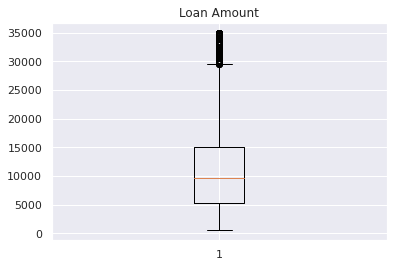

In [146]:
#Box plot for the Loan Amount column
plt.boxplot(filter_df.loan_amnt)
plt.title("Loan Amount")
plt.show()


In [147]:
#Check the loan amount greater 30000
filter_df[filter_df.loan_amnt > 30000]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
31,31825,31825,31825.00000,36,7.90,995.82,A,5 years,MORTGAGE,75000.00,...,Dec-11,Fully Paid,debt_consolidation,NJ,14.03,0,12,27.4,26,34886.91
80,35000,22075,22050.00000,60,17.27,551.84,D,3 years,MORTGAGE,150000.00,...,Dec-11,Fully Paid,home_improvement,NY,7.51,1,11,53.3,31,28887.10
128,35000,35000,35000.00000,36,8.90,1111.37,A,6 years,MORTGAGE,125000.00,...,Dec-11,Fully Paid,debt_consolidation,CA,22.71,0,8,34.8,32,40009.01
185,35000,35000,35000.00000,36,10.65,1140.07,B,2 years,MORTGAGE,168000.00,...,Dec-11,Fully Paid,debt_consolidation,TX,3.17,1,16,1.4,22,38061.50
268,35000,26825,26800.00000,60,18.64,690.56,E,8 years,MORTGAGE,85000.00,...,Dec-11,Fully Paid,debt_consolidation,IL,12.00,1,16,53.0,50,28062.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,35000,35000,31845.22117,60,18.99,907.73,F,10+ years,RENT,128000.00,...,Feb-11,Fully Paid,debt_consolidation,NY,12.27,0,7,97.3,14,49121.62
19760,33000,33000,29044.28153,60,16.77,816.06,E,NaN,MORTGAGE,107507.76,...,Feb-11,Fully Paid,debt_consolidation,WA,20.04,1,6,68.5,24,48963.55
19800,32000,32000,31684.89912,60,20.85,863.01,G,5 years,RENT,62400.00,...,Feb-11,Fully Paid,debt_consolidation,MA,13.04,0,4,97.2,11,44455.80
19811,32000,32000,31569.14450,60,19.74,843.19,F,8 years,RENT,93500.00,...,Feb-11,Fully Paid,debt_consolidation,NY,16.36,0,10,73.9,12,50513.52


In [148]:
#Clean the Loan amount column
filter_df= filter_df[filter_df.loan_amnt <= 30000]

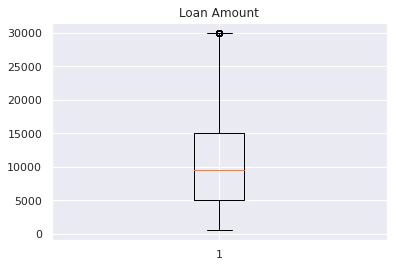

In [149]:
plt.boxplot(filter_df.loan_amnt)
plt.title("Loan Amount")
plt.show()


In [150]:
filter_df.loan_amnt.describe()

count    37792.000000
mean     10598.538050
std       6640.145353
min        500.000000
25%       5050.000000
50%       9500.000000
75%      15000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

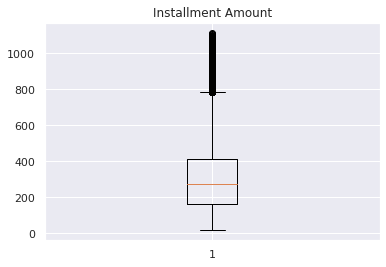

In [151]:
#Box plot for the Installment Amount column
plt.boxplot(filter_df.installment)
plt.title("Installment Amount")
plt.show()

In [152]:
filter_df.installment.describe()

count    37792.000000
mean       311.580512
std        192.830304
min         15.690000
25%        164.357500
50%        273.370000
75%        411.420000
max       1113.540000
Name: installment, dtype: float64

In [153]:
#Check the installment amount greater 900
filter_df[filter_df.installment > 900]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
309,28000,28000,28000.00000,36,12.69,939.26,B,5 years,RENT,100000.0,...,Dec-11,Fully Paid,credit_card,WI,12.35,0,7,67.5,15,33813.16
446,26800,26800,26800.00000,36,19.03,982.79,E,10+ years,MORTGAGE,82000.0,...,Dec-11,Fully Paid,credit_card,CA,21.59,1,12,98.0,31,31286.01
507,30000,30000,30000.00000,36,12.42,1002.46,B,2 years,RENT,80000.0,...,Dec-11,Fully Paid,debt_consolidation,WI,22.23,0,8,94.0,33,36088.48
572,25000,25000,25000.00000,36,19.42,921.72,E,2 years,MORTGAGE,92000.0,...,Dec-11,Fully Paid,credit_card,LA,21.68,0,9,84.5,38,32204.22
717,28000,28000,28000.00000,36,15.96,983.85,C,5 years,MORTGAGE,235000.0,...,Dec-11,Fully Paid,credit_card,VA,9.08,1,10,82.7,27,34735.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34793,25000,25000,24704.49338,36,18.09,904.88,F,10+ years,MORTGAGE,70000.0,...,Oct-09,Charged Off,other,PA,21.02,3,9,74.4,25,14477.45
35812,25000,25000,17165.79344,36,18.53,910.44,F,1 year,MORTGAGE,120000.0,...,Jul-09,Fully Paid,credit_card,OH,24.97,0,22,88.9,29,32775.95
36040,25000,25000,14900.00000,36,18.84,914.42,G,5 years,MORTGAGE,125000.0,...,Jul-09,Fully Paid,small_business,TX,19.30,2,13,49.0,48,25394.25
36091,25000,25000,11949.99858,36,17.90,902.50,F,1 year,OTHER,85000.0,...,Jul-09,Charged Off,small_business,CA,4.93,2,4,10.1,8,18049.62


In [154]:
#Clean the Installment amount column
filter_df= filter_df[filter_df.installment <= 900]

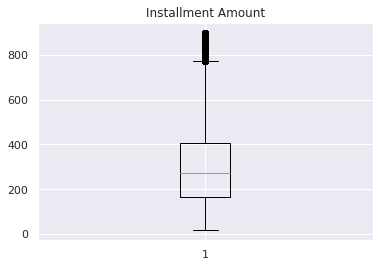

In [155]:
plt.boxplot(filter_df.installment)
plt.title("Installment Amount")
plt.show()

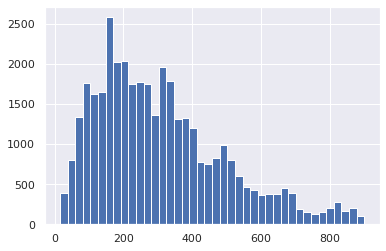

In [156]:
plt.hist(filter_df.installment,bins=40)
plt.show()

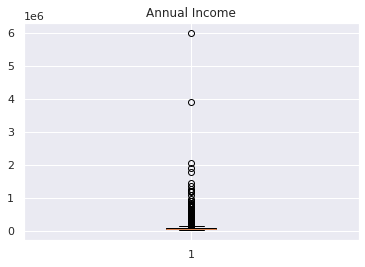

In [157]:
#Box plot for the Annual Income
plt.boxplot(filter_df.annual_inc)
plt.title("Annual Income")
plt.show()

In [158]:
filter_df.annual_inc.describe()

count    3.759600e+04
mean     6.735331e+04
std      6.306978e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.760000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [159]:
#Check the Annual Income greater than 150000
filter_df[filter_df.annual_inc > 150000]



,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
170,25000,25000,25000.0,36,12.42,835.39,B,2 years,RENT,225000.0,...,Dec-11,Fully Paid,debt_consolidation,NJ,8.32,0,11,34.6,23,30073.68
331,15000,15000,15000.0,36,12.42,501.23,B,6 years,OWN,155000.0,...,Dec-11,Fully Paid,debt_consolidation,GA,17.85,0,14,74.9,41,17717.13
392,5000,5000,5000.0,36,6.62,153.52,A,1 year,RENT,276000.0,...,Dec-11,Fully Paid,debt_consolidation,FL,1.82,0,7,56.0,18,5526.66
567,2000,2000,2000.0,36,9.91,64.45,B,1 year,MORTGAGE,231252.0,...,Dec-11,Fully Paid,other,GA,11.43,0,19,93.5,43,2320.20
586,25000,25000,25000.0,36,9.91,805.63,B,4 years,RENT,163000.0,...,Dec-11,Fully Paid,vacation,CA,4.40,0,5,4.6,10,26319.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39692,5000,5000,1775.0,36,9.01,159.03,B,1 year,MORTGAGE,250000.0,...,Jul-07,Fully Paid,other,NY,10.00,0,5,36.6,7,5725.02
39703,3000,3000,2550.0,36,10.28,97.20,C,2 years,MORTGAGE,200000.0,...,Jul-07,Fully Paid,home_improvement,NY,0.00,0,5,0.0,8,3498.86
39706,5000,5000,150.0,36,8.07,156.84,A,< 1 year,MORTGAGE,180000.0,...,Jul-07,Fully Paid,home_improvement,WI,5.55,0,12,26.3,39,5645.96
39707,5000,5000,525.0,36,9.33,159.77,B,2 years,MORTGAGE,180000.0,...,Jul-07,Fully Paid,home_improvement,WI,11.93,1,16,39.2,38,5751.53


In [160]:
#Clean the Annual income greate than 150000 amount column
filter_df= filter_df[filter_df.annual_inc <= 150000]

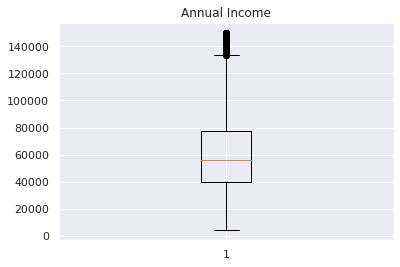

In [161]:
plt.boxplot(filter_df.annual_inc)
plt.title("Annual Income")
plt.show()

In [162]:
filter_df.annual_inc.describe()

count     36309.000000
mean      61201.515111
std       28751.162447
min        4000.000000
25%       40000.000000
50%       55840.000000
75%       77500.000000
max      150000.000000
Name: annual_inc, dtype: float64

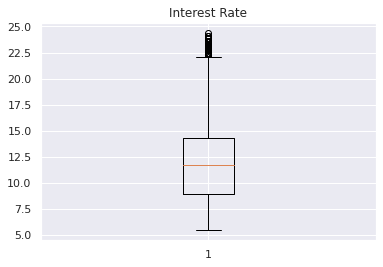

count    36309.000000
mean        11.814593
std          3.625019
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

In [163]:
#Box plot for the Interest Rate column
plt.boxplot(filter_df.int_rate)
plt.title("Interest Rate")
plt.show()
filter_df.int_rate.describe()

In [164]:
#Check the Interest Rate greate thean 24%
filter_df[filter_df.int_rate > 24]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt
1619,24250,24250,24225.0,60,24.11,699.18,G,1 year,MORTGAGE,108000.00,...,Dec-11,Fully Paid,credit_card,LA,12.27,2,8,99.0,28,35626.82
1799,25000,25000,25000.0,60,24.11,720.80,G,4 years,MORTGAGE,145000.00,...,Dec-11,Fully Paid,credit_card,TX,8.30,0,8,97.7,31,31602.40
5964,21250,21250,21225.0,60,24.11,612.68,G,5 years,RENT,80000.00,...,Oct-11,Charged Off,debt_consolidation,NY,22.59,0,15,98.2,24,10258.65
13492,12000,12000,12000.0,60,24.40,348.01,G,7 years,RENT,35775.63,...,Jun-11,Charged Off,renewable_energy,NY,12.98,0,2,98.6,5,4777.71


In [165]:
#Clean the Interst rate greate than 24%
filter_df= filter_df[filter_df.int_rate <= 24.00]

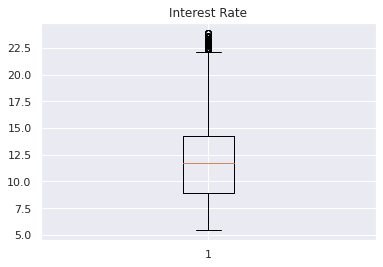

count    36305.000000
mean        11.813230
std          3.622893
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         23.910000
Name: int_rate, dtype: float64

In [166]:
plt.boxplot(filter_df.int_rate)
plt.title("Interest Rate")
plt.show()
filter_df.int_rate.describe()

In [167]:
# check the shape of the data frame
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36305 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36305 non-null  int64  
 1   funded_amnt          36305 non-null  int64  
 2   funded_amnt_inv      36305 non-null  float64
 3   term                 36305 non-null  int64  
 4   int_rate             36305 non-null  float64
 5   installment          36305 non-null  float64
 6   grade                36305 non-null  object 
 7   emp_length           35304 non-null  object 
 8   home_ownership       36305 non-null  object 
 9   annual_inc           36305 non-null  float64
 10  verification_status  36305 non-null  object 
 11  issue_d              36305 non-null  object 
 12  loan_status          36305 non-null  object 
 13  purpose              36305 non-null  object 
 14  addr_state           36305 non-null  object 
 15  dti                  36305 non-null 

######<font color='#1C3879' size='5'>Deriving Extra Columns</font>

In [168]:
# Creating the Month Column from issue date, so as to have month
filter_df['issue_m'] = filter_df.issue_d.apply(lambda x : x[0:3])

In [169]:
# Grouping Annual Income Amounts
annual_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
annual_labels =['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000+']
filter_df['annual_inc_grp']  = pd.cut(filter_df.annual_inc, annual_bins,labels=annual_labels)

In [170]:
# Grouping Loan Amounts
loan_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
loan_labels =['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000+']
filter_df['loan_amnt_grp']  = pd.cut(filter_df.loan_amnt, loan_bins,labels=loan_labels)

In [171]:
# Grouping Interest Rate amounts
int_bins = [0, 5, 10, 15, 20, 25]
int_labels =['0-5','5-10','10-15','15-20','20+']
filter_df['int_rate_grp']  = pd.cut(filter_df.int_rate, int_bins,labels=int_labels)

In [172]:
#Check the shape of the data frame and print some values
filter_df.shape


(36305, 25)

In [173]:
filter_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt,issue_m,annual_inc_grp,loan_amnt_grp,int_rate_grp
0,5000,5000,4975.0,36,10.65,162.87,B,10+ years,RENT,24000.0,...,27.65,1,3,83.7,9,5863.16,Dec,0-25000,0-5000,10-15
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,...,1.00,5,3,9.4,4,1008.71,Dec,25000-50000,0-5000,15-20
2,2400,2400,2400.0,36,15.96,84.33,C,10+ years,RENT,12252.0,...,8.72,2,2,98.5,10,3005.67,Dec,0-25000,0-5000,15-20
3,10000,10000,10000.0,36,13.49,339.31,C,10+ years,RENT,49200.0,...,20.00,1,10,21.0,37,12231.89,Dec,25000-50000,5000-10000,10-15
5,5000,5000,5000.0,36,7.90,156.46,A,3 years,RENT,36000.0,...,11.20,3,9,28.3,12,5632.21,Dec,25000-50000,0-5000,5-10


####<font color='Green' size='5'><b>EDA: Exploratory Data Analysis</b></font>

##### Univariate Analysis

In [174]:
#filter all the Charged off loan to new data set
chargedoff = filter_df[filter_df.loan_status == 'Charged Off']
chargedoff

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,dti,inq_last_6mths,open_acc,revol_util,total_acc,total_pymnt,issue_m,annual_inc_grp,loan_amnt_grp,int_rate_grp
1,2500,2500,2500.0,60,15.27,59.83,C,< 1 year,RENT,30000.0,...,1.00,5,3,9.4,4,1008.71,Dec,25000-50000,0-5000,15-20
8,5600,5600,5600.0,60,21.28,152.39,F,4 years,OWN,40000.0,...,5.55,2,11,32.6,13,646.02,Dec,25000-50000,5000-10000,20+
9,5375,5375,5350.0,60,12.69,121.45,B,< 1 year,RENT,15000.0,...,18.08,0,2,36.5,3,1476.19,Dec,0-25000,5000-10000,10-15
12,9000,9000,9000.0,36,13.49,305.38,C,< 1 year,RENT,30000.0,...,10.08,1,4,91.7,9,2270.70,Dec,25000-50000,5000-10000,10-15
14,10000,10000,10000.0,36,10.65,325.74,B,3 years,RENT,100000.0,...,7.06,2,14,55.5,29,7471.99,Dec,75000-100000,5000-10000,10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39666,15450,15450,600.0,36,11.22,507.46,C,2 years,MORTGAGE,40000.0,...,13.50,3,13,34.3,29,11652.75,Aug,25000-50000,15000-20000,10-15
39667,2500,2500,675.0,36,12.80,84.00,D,< 1 year,MORTGAGE,32000.0,...,20.00,1,11,35.1,32,2220.61,Aug,25000-50000,0-5000,10-15
39668,2500,2500,825.0,36,9.64,80.26,B,< 1 year,MORTGAGE,75000.0,...,20.00,3,9,3.8,35,2086.63,Aug,50000-75000,0-5000,5-10
39678,1000,1000,950.0,36,10.59,32.55,C,2 years,MORTGAGE,33990.0,...,14.47,1,9,36.9,11,703.95,Aug,25000-50000,0-5000,10-15


**Analysis:** 

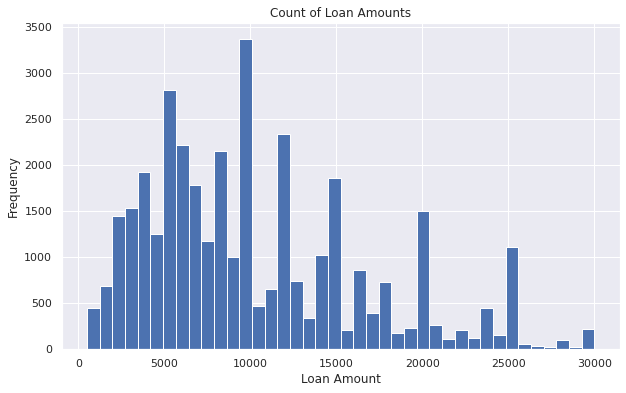

In [175]:
# Frequency of the Loan Amonts
plt.figure(figsize=(10,6))
plt.hist(filter_df.loan_amnt,bins=40)
plt.title("Count of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


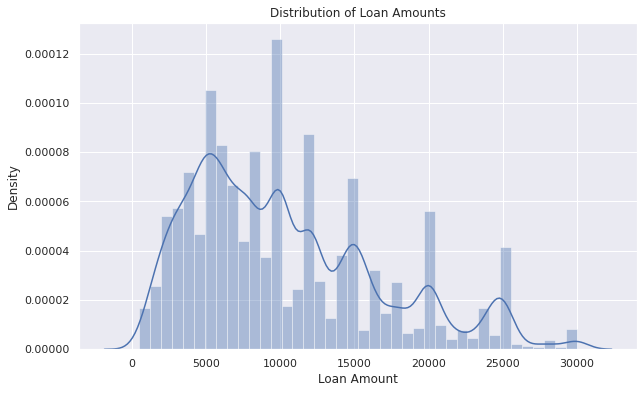

In [176]:
plt.figure(figsize=(10,6))
sns.distplot(filter_df.loan_amnt,bins=40)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

**Observation**: From the bove plots we can observe that most of the Loan amounts are in 5000 to 20000

**Analysis:** Count of Full Paid Vs Charged Off Loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


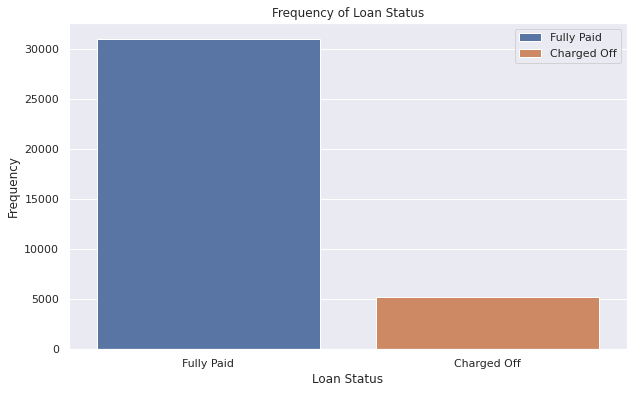

In [177]:
#count of Fully Paid Vs Charged Off Loans
plt.figure(figsize=(10,6))
sns.countplot(filter_df.loan_status,hue = filter_df.loan_status,dodge=False )
plt.title("Frequency of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Frequency")
plt.legend(["Fully Paid","Charged Off"])
plt.show()

Observation:From the above plot we can observe that Frequency of Fully Paid Loans are more than that of Charged off Loans

**Analysis:** Frequency of Charged of Loans

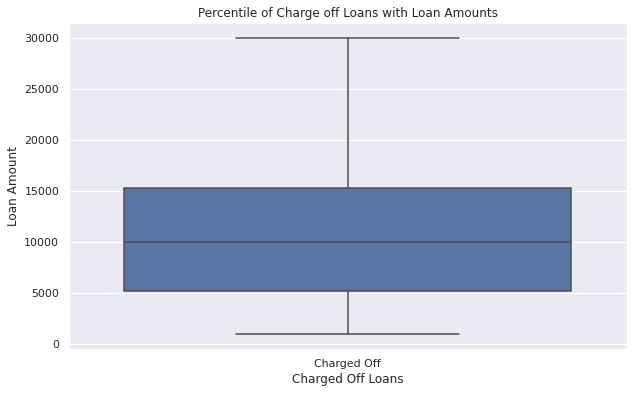

In [178]:
#boxploat to describe the mean,min and max for the charge off loans
plt.figure(figsize=(10,6))
sns.boxplot(x=filter_df[filter_df.loan_status == 'Charged Off'].loan_status,y=chargedoff.loan_amnt)
plt.title("Percentile of Charge off Loans with Loan Amounts")
plt.ylabel("Loan Amount")
plt.xlabel("Charged Off Loans")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


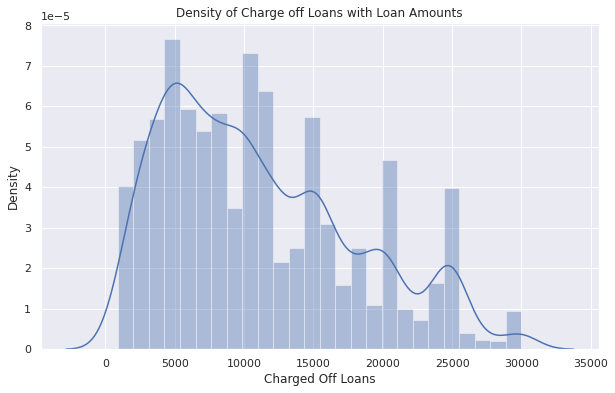

In [179]:
plt.figure(figsize=(10,6))
sns.distplot(filter_df[filter_df.loan_status == 'Charged Off'].loan_amnt)
plt.title("Density of Charge off Loans with Loan Amounts")
plt.ylabel("Density")
plt.xlabel("Charged Off Loans")
plt.show()

Observation:From the bove plots we can observe that most of the charge of loan amounts are between 5000 to 15000

**Analysis:** Frequency of Loan Terms with Respect to Laon Status

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


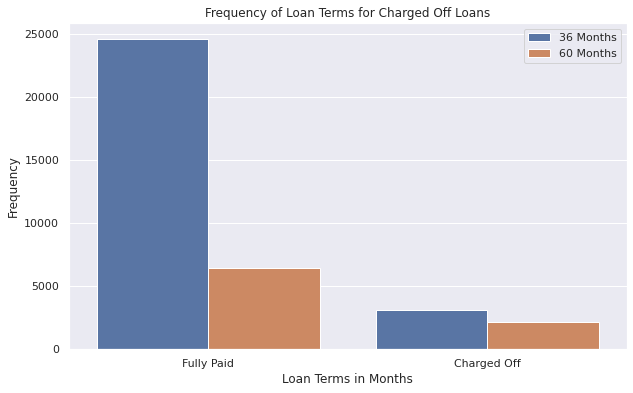

In [180]:
#count of Term of Loans
plt.figure(figsize=(10,6))
sns.countplot(filter_df.loan_status,hue=filter_df.term)
plt.title("Frequency of Loan Terms for Charged Off Loans")
plt.xlabel("Loan Terms in Months")
plt.ylabel("Frequency")
plt.legend(['36 Months','60 Months'])
plt.show()

Observation:From the above we can observe thet Frequecy of 36 M Loan terms is higher that 60 M Loan Terms for both Charged off and Fully Paid Loans

**Analysis:** Frequency of Home Ownership for the Charged off Loan Amounts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


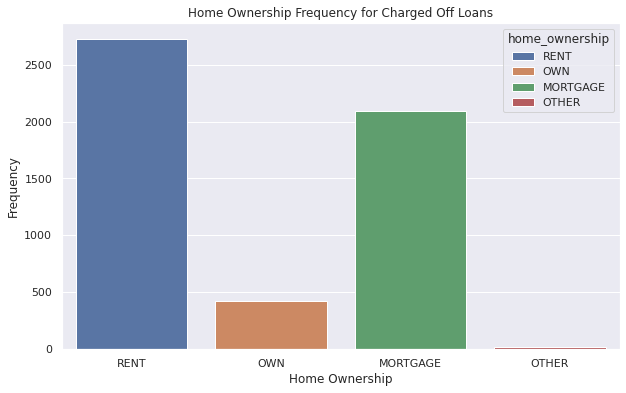

In [181]:

plt.figure(figsize=(10,6))
sns.countplot(chargedoff.home_ownership,hue=chargedoff.home_ownership,dodge=False)
plt.title("Home Ownership Frequency for Charged Off Loans")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.show()

Observation:From the above we can observe that Count of Charged off loans is more with Rented Homeownership whereas its less with Own Homeownership.

**Analysis:** Count of the Purpose of Loans

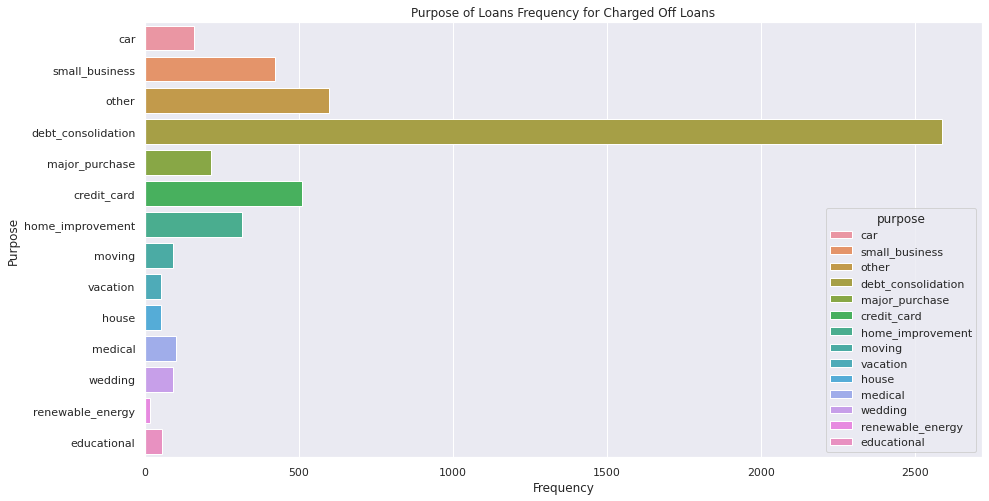

In [182]:
#count of Purpose of Loans
plt.figure(figsize=(15,8))
sns.countplot(y=chargedoff.purpose,hue=chargedoff.purpose,dodge=False)
plt.title("Purpose of Loans Frequency for Charged Off Loans")
plt.xlabel("Frequency")
plt.ylabel("Purpose")
plt.show()

Observation:From the above we can observe that Count of debt_consolidation is more than any other purpose for Charged Off loans

##### Bi Variate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

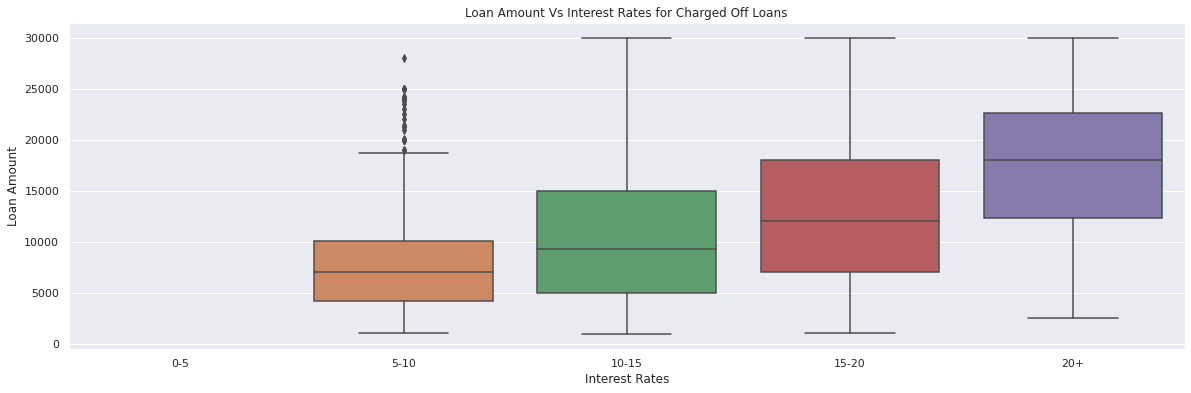

In [183]:
# Scatter plot to check the loan amount and interest rates for Charged Off Loans
plt.figure(figsize=(20,6))
sns.boxplot(chargedoff.int_rate_grp,chargedoff.loan_amnt)
plt.title("Loan Amount Vs Interest Rates for Charged Off Loans")
plt.xlabel("Interest Rates")
plt.ylabel("Loan Amount")
plt.show

**Observation:** For Loan with Higher Amount we have higher rate of interest

**Analysis:** Home Ownership Frequency with respect to Loan Terms for Charged Off Loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


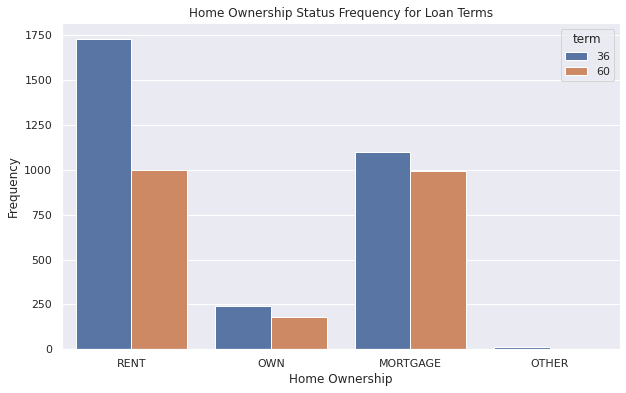

In [184]:

plt.figure(figsize=(10,6))
sns.countplot(chargedoff.home_ownership,hue=chargedoff.term)
plt.title("Home Ownership Status Frequency for Loan Terms")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency")
plt.show()

Observation= From the above we can observe that loans with Home Ownership as Rent and low Payment terms are more for Charged off Loans

Grades vs Loan amount
Annual income vs loan amount
States vs loan amount
Interest Rates vs loan amount
Employee experience vs loan amount
Purpose Vs loan amounts
cdi vs loan amounts

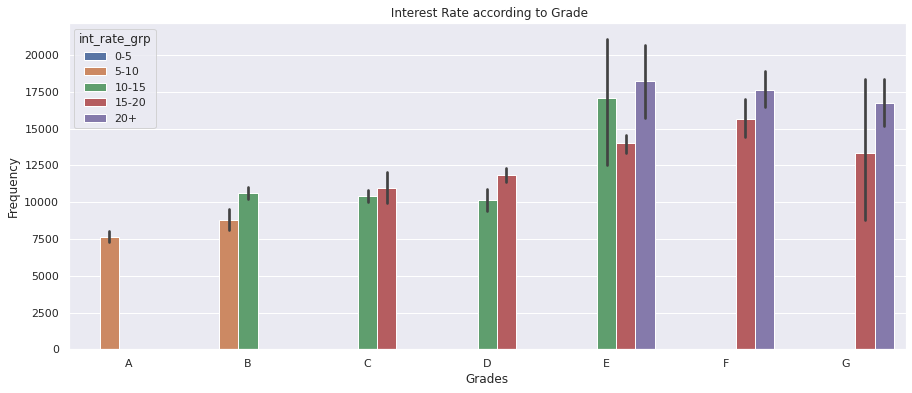

In [185]:
plt.figure(figsize=(15,6))
sns.barplot(x=chargedoff.grade,y=chargedoff.loan_amnt,hue=chargedoff.int_rate_grp, order='ABCDEFG')
plt.title(" Interest Rate according to Grade")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.show()

**Observation:**It is Observed Borrower with A Grade has less interest rate and has less Charged off loans as compared to Grades E,F,G which have high interest rates and high frequency of Charged Off loans

**Analysis**: Anuual Income with repect to Charged off Loans

In [186]:
annual_inc_loans = filter_df.groupby(['annual_inc_grp','loan_status']).loan_status.count().unstack().reset_index()

In [187]:
annual_inc_loans['Ratio'] = annual_inc_loans['Charged Off']/(annual_inc_loans['Charged Off'] + annual_inc_loans['Fully Paid'])
annual_inc_loans

loan_status,annual_inc_grp,Charged Off,Fully Paid,Ratio
0,0-25000,481,2050,0.190043
1,25000-50000,2114,10695,0.165040
2,50000-75000,1625,9866,0.141415
3,75000-100000,669,5108,0.115804
4,100000-125000,252,2255,0.100519
5,125000+,122,1068,0.102521


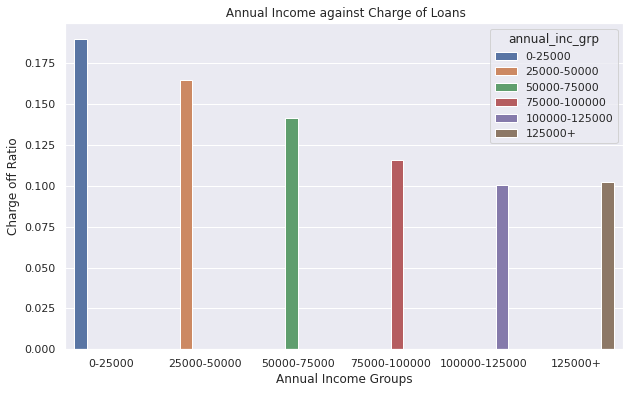

In [188]:
plt.figure(figsize=(10,6))
sns.barplot(x=annual_inc_loans.annual_inc_grp,y=annual_inc_loans.Ratio,hue=annual_inc_loans.annual_inc_grp)
plt.title(" Annual Income against Charge of Loans")
plt.xlabel("Annual Income Groups")
plt.ylabel("Charge off Ratio")
plt.show()

**Observation:** High Amount of Charged off loans are with Borrowers whose Annual Income less than 25000 and as Annual income increases the Charged Off propability decreases

**Analysis**: Interest Rate Group with repect to Charged off Loans

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


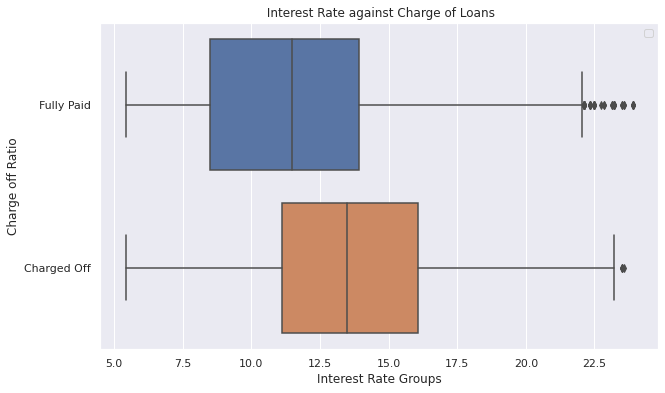

In [189]:
plt.figure(figsize=(10,6))
sns.boxplot(filter_df.int_rate,filter_df.loan_status)
plt.title(" Interest Rate against Charge of Loans")
plt.xlabel("Interest Rate Groups")
plt.ylabel("Charge off Ratio")
plt.legend(bbox_to_anchor=(1.00,1.00))
plt.show()

**Observation:** As amount of Interest rate increases the Charge-Off probability of the loan increases

**Analysis**: Loan amounts with respect to States and Loan Status

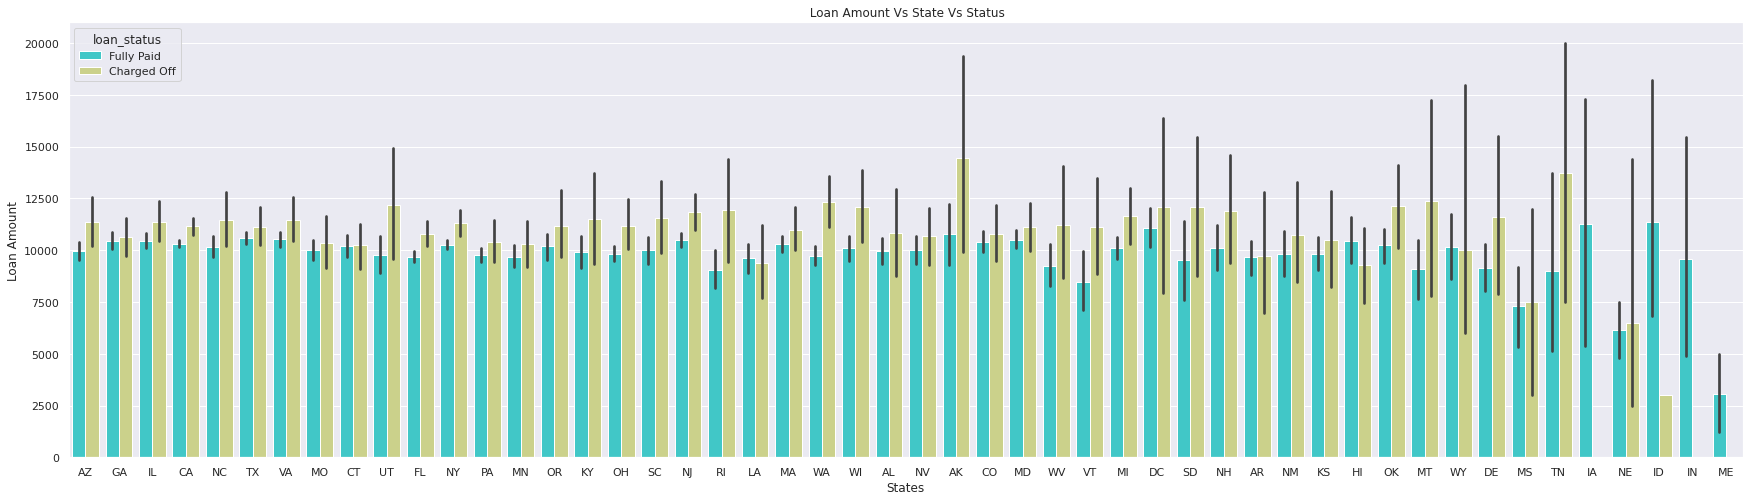

In [190]:
plt.figure(figsize=(30,8))
sns.barplot(x=filter_df.addr_state,y=filter_df.loan_amnt,hue=filter_df.loan_status,palette='rainbow')
plt.title(" Loan Amount Vs State Vs Status")
plt.xlabel("States")
plt.ylabel("Loan Amount")
plt.show()

**Observation:** AK and TN has highest rate of Charged Off loans

**Analysis**: Loan amounts with respect to Employee Experience and Loan Status

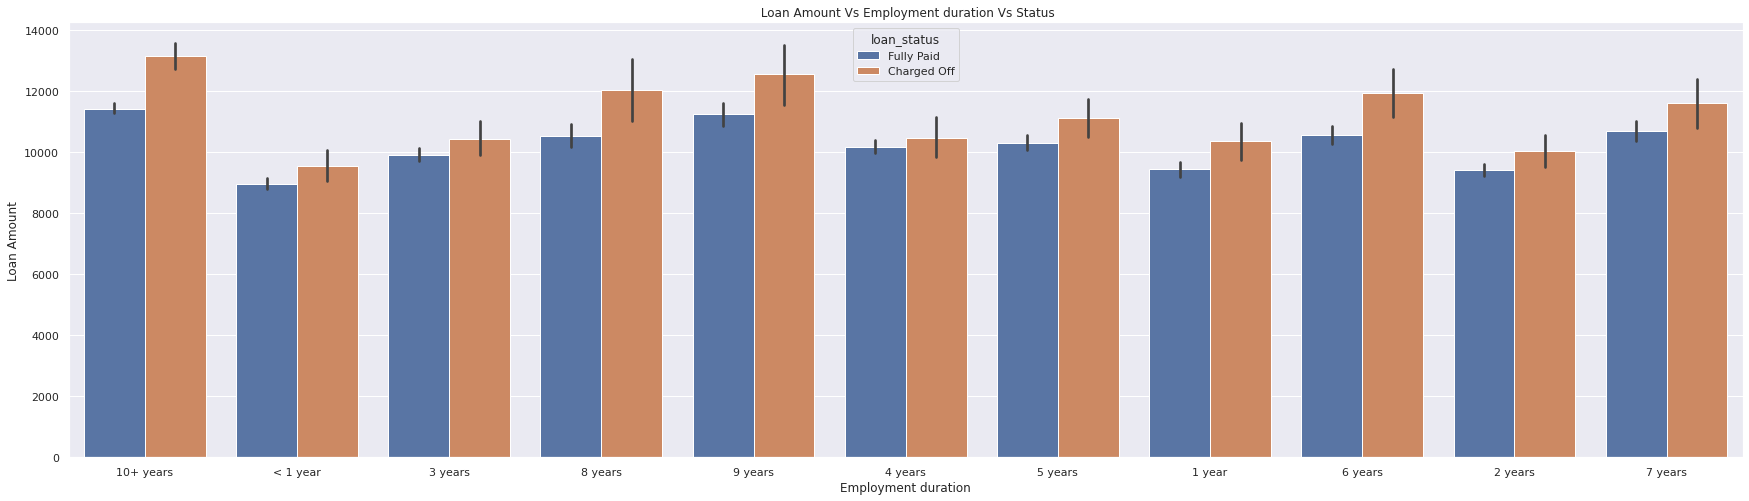

In [191]:
plt.figure(figsize=(30,8))
sns.barplot(x=filter_df.emp_length,y=filter_df.loan_amnt,hue=filter_df.loan_status)
plt.title(" Loan Amount Vs Employment duration Vs Status")
plt.xlabel("Employment duration")
plt.ylabel("Loan Amount")
plt.show()



---

**Analysis : Analyzing the percentage of chargeoffs and fully paid customers based on Lending Club Verification Status**
> Doing a bivariant analysis on Lending Club verification status against Loan status 

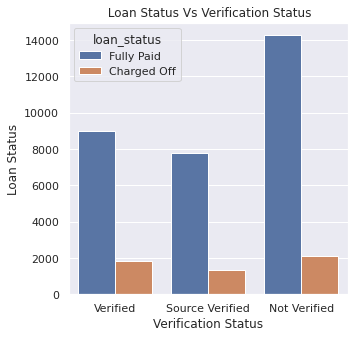

In [192]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.countplot(data=filter_df,x=filter_df["verification_status"],hue=filter_df["loan_status"])
plt.title(" Loan Status Vs Verification Status")
plt.xlabel("Verification Status")
plt.ylabel("Loan Status")
plt.show()

> Verification Status field does not seem to a good attribute to do approval on as it seems to have no much impact

<font color='Blue'><b>**Recommended to check what are the criterias used for current verification 
and fine tune them to include more relevant questions**</b></font> 


---
**Analysis : There is a chance that long term of loan may discourage borrowers from paying rest of loan**
> Doing a bivariant analysis on Loan Term against Loan status 

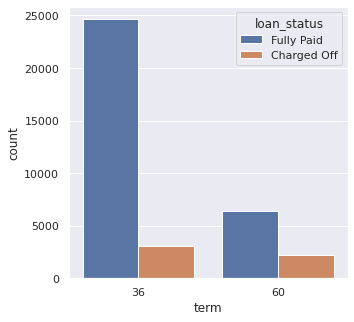

In [193]:
plt.figure(figsize=(5,5))
sns.countplot(data=filter_df,x=filter_df["term"],hue=filter_df["loan_status"])

Comparing the ration between fully paid and charged off loans, loans with higher terms is having a high percentage of them being charge off. This is a factor which should be considered for approvals

<font color='Blue'><b>**Recommended to check the members age, income range and current liabilities to ensure ability to repay a long term loan**</b></font>

---
**Analysis :Interest rate of a loan is always a guiding factor**
> Doing a bivariant analysis on Interest against Loan status 

> This involves binning the interest rate into different ranges for comparison

No handles with labels found to put in legend.


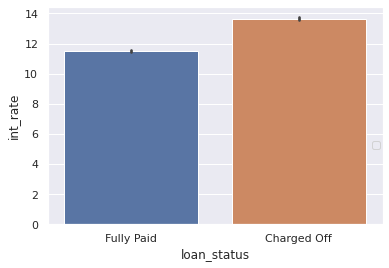

In [194]:
sns.barplot(y=filter_df["int_rate"],x=filter_df["loan_status"])
plt.legend(bbox_to_anchor=(1.01,0.41))

In the above plot we can observe that loans with in the interest range of 12-14 % are all charged off.
This is an important factor affecting loan approvals

<font color='Blue'><b>**Recommend to take extra measures when approving loans with high interest , may be approving a reduced amount and checking credit score of the member will help in further profiling the loan requester**</b></font>

---
**Analysis : Check whether income range is a factor affecting ability to repay, Also compare it against employement length range**
> Doing a bivariant analysis on Member Income and Employment length against Loan status 

> This involves binning the income range into different ranges for comparison

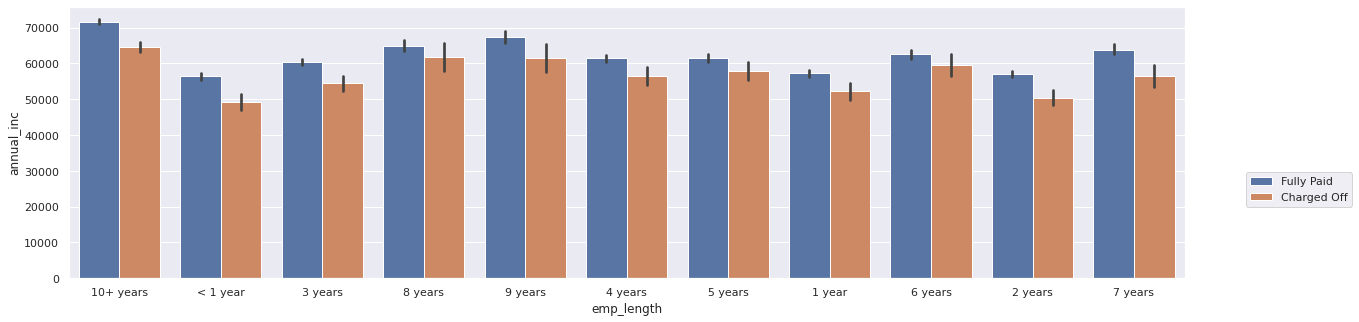

In [195]:
plt.figure(figsize=(20, 5))
sns.barplot(y=filter_df["annual_inc"],x=filter_df["emp_length"],hue=filter_df["loan_status"])
plt.legend(bbox_to_anchor=(1.05,0.41))

Not able to find a definite relation between data and outliers are more, lets do the same analysis with just annual income

---
**Analysis#5 : Check whether ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. has impact on ability to repay**
> Doing a bivariant analysis on dti ratio against loan_status

> This involves binning the dti ratio into different ranges for comparison

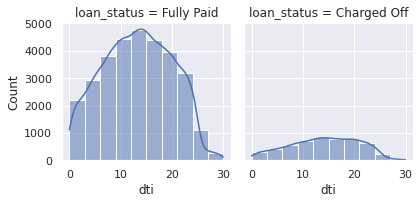

In [196]:
sns.set_theme(style="darkgrid")
sns.displot(
    filter_df, x="dti", col="loan_status",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),kde=True
)

We can observe that when the requesters current debt payments are with in 10-15% of his income there is a high chance that he will fully repay the loan.

<font color='Blue'><b>**Recommend to take precautions while approving loans for requesters who is currently using above 25% of their income to pay debts, checking the completion dates of their ongoing loans or thier payment patterns for existing loans like dues will help to further profile them**</b></font>


####<font color='Green' size='5'><b>Recommendations</b></font>

##### <font color='Purple' size='2'><b>Recommendations to improve faster aprovals</b></font>

##### <font color='Purple' size='2'><b>Recommendations to avoid loan defaults</b></font>